<span style="font-size:20px; font-weight:bold;">Research Question:</span>
<h1 style="text-align:center; font-size:24px;">Is there a significant difference in average self-esteem levels between individuals who spend too little time versus those who spend too much time on social media?</h1>

<span style="font-size:18px; font-weight:bold;">Step #1: Data Cleaning</span>

In [282]:
import pandas as pd

# URL to the raw data
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"

# Load the file into a DataFrame
data = pd.read_csv(url, low_memory=False)

# Display the first few rows
print(data)

        UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0      cscs_00001                   1              Yes                  Yes   
1      cscs_00002                   1              Yes                  Yes   
2      cscs_00003                   1              Yes                  Yes   
3      cscs_00005                   1              Yes                  Yes   
4      cscs_00006                   1              Yes                  Yes   
...           ...                 ...              ...                  ...   
11426  cscs_11809                   1              Yes                  Yes   
11427  cscs_11810                   1              Yes                  Yes   
11428  cscs_11812                   3              Yes                  NaN   
11429  cscs_11812                   3              Yes                  NaN   
11430  cscs_11812                   3              Yes                  Yes   

           GEO_province  DEMO_age DEMO_gender DEMO_

In [283]:
# Filter for the desired columns
data = data[["LIFESTYLE_time_use_balance_media", "PSYCH_self_esteem_unknown_scale_high"]]
print(data)

      LIFESTYLE_time_use_balance_media PSYCH_self_esteem_unknown_scale_high
0                                  NaN                                  NaN
1                                  NaN                                  NaN
2                                  NaN                                  NaN
3                                  NaN                                  NaN
4                Just the right amount                  (7) Very true of me
...                                ...                                  ...
11426                              NaN                                  NaN
11427                              NaN                                  NaN
11428                              NaN                                  NaN
11429                              NaN                                  NaN
11430                         Too much                                    5

[11431 rows x 2 columns]


In [284]:
# Find indices with irrelevant responses for both columns
no_response_indices = data[
    (data['LIFESTYLE_time_use_balance_media'] == 'Presented but no response') |
    (data['LIFESTYLE_time_use_balance_media'] == 'Just the right amount') |
    (data['PSYCH_self_esteem_unknown_scale_high'] == 'Presented but no response')
].index

# Drop rows with no response and NaN values
data_cleaned = data.drop(no_response_indices).dropna()

# Assign self-esteem values to be number 1 through 7
self_esteem_mapping = {
    '(1) Not very true of me': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '(7) Very true of me': 7
}

# Map self-esteem valules and convert them to type int
data_cleaned.loc[:, 'PSYCH_self_esteem_unknown_scale_high'] = data_cleaned['PSYCH_self_esteem_unknown_scale_high'].map(self_esteem_mapping)
data_cleaned['PSYCH_self_esteem_unknown_scale_high'] = data_cleaned['PSYCH_self_esteem_unknown_scale_high'].astype(int)

# Rename columns
data_cleaned = data_cleaned.rename(columns={
    'LIFESTYLE_time_use_balance_media': 'Usage of Social Media',
    'PSYCH_self_esteem_unknown_scale_high': 'Self-Esteem Rating'
})

# Display the cleaned data
print(data_cleaned)

      Usage of Social Media  Self-Esteem Rating
13                 Too much                   5
60                 Too much                   4
64                 Too much                   4
65               Too little                   7
78                 Too much                   6
...                     ...                 ...
11375              Too much                   5
11381              Too much                   4
11398              Too much                   5
11410              Too much                   4
11430              Too much                   5

[647 rows x 2 columns]


In [285]:
# Create two seperate data frames

# Filter for rows where the first column is 'Too much'
df_too_much = data_cleaned[data_cleaned['Usage of Social Media'] == 'Too much']

# Filter for rows where the first column is 'Too little'
df_too_little = data_cleaned[data_cleaned['Usage of Social Media'] == 'Too little']

# Display the resulting data frames
print(df_too_much)
print(df_too_little)

      Usage of Social Media  Self-Esteem Rating
13                 Too much                   5
60                 Too much                   4
64                 Too much                   4
78                 Too much                   6
141                Too much                   1
...                     ...                 ...
11375              Too much                   5
11381              Too much                   4
11398              Too much                   5
11410              Too much                   4
11430              Too much                   5

[478 rows x 2 columns]
      Usage of Social Media  Self-Esteem Rating
65               Too little                   7
136              Too little                   3
228              Too little                   4
313              Too little                   6
405              Too little                   7
...                     ...                 ...
11182            Too little                   4
11185           

<span style="font-size:18px; font-weight:bold;">Step #2: Data Visualization</span>

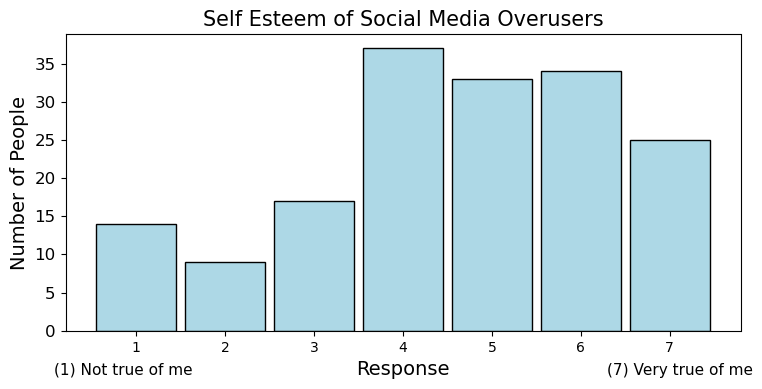

In [286]:
import matplotlib.pyplot as plt

# Extract numeric values from the index and use them for sorting
response_counts = df_too_little['Self-Esteem Rating'].value_counts()

# Sort the index numerically
response_counts = response_counts.sort_index()

# Create the bar graph
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(
    response_counts.index,  # Use numeric values as x-axis
    response_counts.values,  # Counts for y-axis
    color='lightblue',
    edgecolor='black',
    width=0.9  # Thicker bars
)

# Add numeric labels under each bar
ax.set_xticks(response_counts.index)
ax.set_xticklabels(response_counts.index, fontsize=10)

# Add a subtitle under the x-axis
plt.text(
    0.5, -0.15,  # X and Y coordinates for the text
    '(1) Not true of me                                                                                     (7) Very true of me',
    fontsize=11,
    ha='center',
    transform=ax.transAxes  # Place the text relative to the axes
)

# Customize labels and title
plt.title('Self Esteem of Social Media Overusers', fontsize=15)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


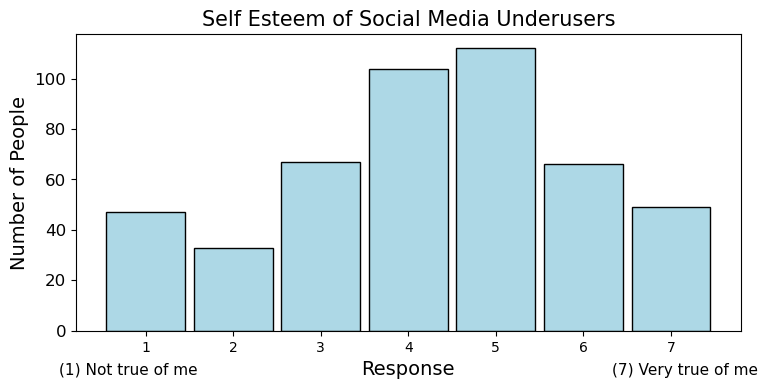

In [287]:
import matplotlib.pyplot as plt

# Extract numeric values from the index and use them for sorting
response_counts = df_too_much['Self-Esteem Rating'].value_counts()

# Sort the index numerically
response_counts = response_counts.sort_index()

# Create the bar graph
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(
    response_counts.index,  # Use numeric values as x-axis
    response_counts.values,  # Counts for y-axis
    color='lightblue',
    edgecolor='black',
    width=0.9  # Thicker bars
)

# Add numeric labels under each bar
ax.set_xticks(response_counts.index)
ax.set_xticklabels(response_counts.index, fontsize=10)

# Add a subtitle under the x-axis
plt.text(
    0.5, -0.15,  # X and Y coordinates for the text
    '(1) Not true of me                                                                                     (7) Very true of me',
    fontsize=11,
    ha='center',
    transform=ax.transAxes  # Place the text relative to the axes
)

# Customize labels and title
plt.title('Self Esteem of Social Media Underusers', fontsize=15)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


<span style="font-size:18px; font-weight:bold;">Step #3: Analysis by T-test and Hypothesis Testing</span>

Null Hypothesis ($H_0$) = There is no differnce in average self esteem between those who spend too little and too much time on social media.
Alternative Hypothesis ($H_A$): There is a difference in average self esteem between those who spend too little and too much time on social media.

Significance level (α) = 0.05

In [288]:
import pandas as pd
import scipy.stats as stats

# Calculates mean, standard deviation, and sample size for both groups
def descriptive_stats(df, group_name):
    print(f"\nDescriptive statistics for {group_name}:")
    print(f"Mean: {df['Self-Esteem Rating'].mean():.2f}")
    print(f"Standard Deviation: {df['Self-Esteem Rating'].std():.2f}")
    print(f"Sample Size: {df['Self-Esteem Rating'].count()}")

descriptive_stats(df_too_much, "Social Media Overusers")
descriptive_stats(df_too_little, "Social Media Underusers")

# Conduct an independent t-test
# Compares the "Self-Esteem Rating" values between both groups to see if there is a statistically significant difference
t_stat, p_value = stats.ttest_ind(df_too_much['Self-Esteem Rating'], df_too_little['Self-Esteem Rating'], equal_var=False)  # Welch's t-test

# Output t-test results
print("\nT-test results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("The difference in means is statistically significant (p < 0.05).")
else:
    print("The difference in means is not statistically significant (p >= 0.05).")



Descriptive statistics for Social Media Overusers:
Mean: 4.24
Standard Deviation: 1.72
Sample Size: 478

Descriptive statistics for Social Media Underusers:
Mean: 4.59
Standard Deviation: 1.75
Sample Size: 169

T-test results:
T-statistic: -2.19
P-value: 0.0296
The difference in means is statistically significant (p < 0.05).


| p-value Range       | Evidence                              |
|---------------------|---------------------------------------|
| p > 0.1             | No evidence against the null hypothesis |
| 0.1 ≥ p > 0.05      | Weak evidence against the null hypothesis |
| 0.05 ≥ p > 0.01     | Moderate evidence against the null hypothesis |
| 0.01 ≥ p > 0.001    | Strong evidence against the null hypothesis |
| 0.001 ≥ p           | Very strong evidence against the null hypothesis |


<h1 style="text-align:center; font-size:18px;">After our analysis we have concluded p = 0.0296. This is in the range 0.05 ≥ p ≥ 0.01 so we have moderate evidence against the null hypothesis. Thus, we reject the null hypothesis that there is no differnce in average self esteem between those who spend too little and too much time on social media.</h1>


<h1 style="text-align:center; font-size:20px;">Therefore, there is a statistically significant difference in average self esteem between those who spend too little and too much time on social media.</h1>

Mikaela Garcia